# Installing Dependencies and Importing the Libraries

In [1]:
!pip install --upgrade gensim

In [2]:
# nltk - for removing stopwords
import nltk
nltk.download('stopwords')
#pandas - for reading dataframes
import pandas as pd
from nltk.corpus import stopwords
stopwords.words('english')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
#mtplotlib - for printing plots
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import gensim
from gensim.models import Word2Vec
# tsne visulisation
from sklearn.manifold import TSNE
import re
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Importing the Dataset

In [3]:
data = pd.read_csv('/content/bengali_hate_v2.0.csv')
data.head()

,text,label,target
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0


# Importing stop words csv file

In [4]:
stop_df = pd.read_csv('/content/stop.csv', sep='\n', header= None)
#stop_words.head()
stop_words = []
stop_words = list(stop_df[0])
print(stop_words)
stop_words.append('!')
stop_words.append('-')
stpwrd = nltk.corpus.stopwords.words('english')
#extending the stopwords list by adding the stop_df words to the initial stopwords list
stpwrd.extend(stop_words)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

# Removing stopwords from the dataframe

In [5]:
def cleaning(text):
  text_tokens = word_tokenize(text)
  removing_custom_words = [words for words in text_tokens if not words in stpwrd]
  new_sent = " ".join(removing_custom_words)
  return new_sent

In [6]:
for i in range(len(data['text'])):
  data['text'][0] = cleaning(data['text'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data.columns

Index(['text', 'label', 'target'], dtype='object')

# Removing the Punctuations from the sentences

In [8]:
def punctuation(t1):
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_fullstop = u"\u0964"
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    t1= whitespace.sub(" ",t1).strip()
    t1 = re.sub(punctSeq, " ", t1)
    t1 = re.sub(bangla_fullstop, " ",t1)
    t1 = re.sub(punc, " ", t1)
    return t1

In [9]:
data['text']=data['text'].apply(punctuation)

# Replacing the bengali numerical values with english numerical values

In [10]:
def replace_num(one):
    one = one.replace("০","0")
    one=one.replace("১","1")
    one=one.replace("২","2")
    one=one.replace("৩","3")
    one=one.replace("৪","4")
    one=one.replace("৫","5")
    one=one.replace("৬","6")
    one=one.replace("৭","7")
    one=one.replace("৮","8")
    one=one.replace("৯","9")
    return one

In [11]:
data['text']=data['text'].apply(replace_num)

# Removing the non bengali words

In [12]:
def non_bengali(a):
    a = "".join(i for i in a if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
    a=re.sub(' +', ' ', a)
    return a

In [13]:
data['text']=data['text'].apply(non_bengali)

In [14]:
data['text'][144]

'হিন্দু বা কাফের দের সাতে হাত মিলিয়ে সারা দুনিয়াতে ফেতনা লাগায়ে নিজেরা শেষ হয়ে জাচ্ছে'

# Indic Nlp

The goal of the Indic NLP Library is to build Python based libraries for common text processing and Natural Language Processing in Indian languages. Indian languages share a lot of similarity in terms of script, phonology, language syntax, etc.

In [15]:
!pip install indic-nlp-library

Importing the indic nlp library

In [16]:
import sys
from indicnlp import common

# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"

# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))

# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

In [17]:
from indicnlp.tokenize import indic_tokenize  

print('Input String: {}'.format(data['text'][150]))
print('Tokens: ')
for t in indic_tokenize.trivial_tokenize(data['text'][150],lang='bn'): 
    print(t)

Input String: বাংলাদেশে যতো ইসলাম ধর্ম নিয়ে কটুক্তি করা হয় তা যদি সরকারের বিরুদ্ধে করতো তাহলে নুরুর মতো অবস্থা হতো 
Tokens: 
বাংলাদেশে
যতো
ইসলাম
ধর্ম
নিয়ে
কটুক্তি
করা
হয়
তা
যদি
সরকারের
বিরুদ্ধে
করতো
তাহলে
নুরুর
মতো
অবস্থা
হতো


# Normalising using Indic

In [18]:
input_text=data['text'][18]
remove_nuktas=False
factory=IndicNormalizerFactory()
normalizer=factory.get_normalizer("bn")
output_text=normalizer.normalize(input_text)

print(input_text)
print()

print('Before normalization')
print(' '.join([ hex(ord(c)) for c in input_text ] ))
print('Length: {}'.format(len(input_text)))
print()    
print('After normalization')
print(' '.join([ hex(ord(c)) for c in output_text ] ))
print('Length: {}'.format(len(output_text)))  
print(output_text)

দেহ ব্যবসায়ী মমতাজ যদি সংসদ সদস্য হতেপারে তাহলে হিরো আলম হতে পারবেনা কেনো 

Before normalization
0x9a6 0x9c7 0x9b9 0x20 0x9ac 0x9cd 0x9af 0x9ac 0x9b8 0x9be 0x9df 0x9c0 0x20 0x9ae 0x9ae 0x9a4 0x9be 0x99c 0x20 0x9af 0x9a6 0x9bf 0x20 0x9b8 0x982 0x9b8 0x9a6 0x20 0x9b8 0x9a6 0x9b8 0x9cd 0x9af 0x20 0x9b9 0x9a4 0x9c7 0x9aa 0x9be 0x9b0 0x9c7 0x20 0x9a4 0x9be 0x9b9 0x9b2 0x9c7 0x20 0x9b9 0x9bf 0x9b0 0x9cb 0x20 0x986 0x9b2 0x9ae 0x20 0x9b9 0x9a4 0x9c7 0x20 0x9aa 0x9be 0x9b0 0x9ac 0x9c7 0x9a8 0x9be 0x20 0x995 0x9c7 0x9a8 0x9cb 0x20
Length: 74

After normalization
0x9a6 0x9c7 0x9b9 0x20 0x9ac 0x9cd 0x9af 0x9ac 0x9b8 0x9be 0x9af 0x9bc 0x9c0 0x20 0x9ae 0x9ae 0x9a4 0x9be 0x99c 0x20 0x9af 0x9a6 0x9bf 0x20 0x9b8 0x982 0x9b8 0x9a6 0x20 0x9b8 0x9a6 0x9b8 0x9cd 0x9af 0x20 0x9b9 0x9a4 0x9c7 0x9aa 0x9be 0x9b0 0x9c7 0x20 0x9a4 0x9be 0x9b9 0x9b2 0x9c7 0x20 0x9b9 0x9bf 0x9b0 0x9cb 0x20 0x986 0x9b2 0x9ae 0x20 0x9b9 0x9a4 0x9c7 0x20 0x9aa 0x9be 0x9b0 0x9ac 0x9c7 0x9a8 0x9be 0x20 0x995 0x9c7 0x9a8 0x9cb 0x20
Len

Splitting Sentence into Words

In [20]:
def basic_clean(text):    
    remove_nuktas=False
    factory=IndicNormalizerFactory()
    normalizer=factory.get_normalizer("bn")
    output_text=normalizer.normalize(text)
    words=indic_tokenize.trivial_tokenize(text,lang='bn')
    return words

In [21]:
words = basic_clean(''.join(str(data['text'].tolist())))

In [22]:
values=[]

size=data.shape[0]
for i in range(0,size):
        worddd=basic_clean(data['text'][i])
        values.append(worddd)

In [23]:
size

5698

Printing samples

In [24]:
print(words[:10])

['[', "'", 'বৌদির', 'দুধ', 'দেকে', 'চোখ', 'ছিলো', 'পোলাপান', 'চোখ', 'কিভাবে']


In [25]:
print(values[:20])

[['বৌদির', 'দুধ', 'দেকে', 'চোখ', 'ছিলো', 'পোলাপান', 'চোখ', 'কিভাবে'], ['এই', 'সরকার', 'কে', 'যারা', 'নির্লজ্জের', 'মত', 'সাপোর্ট', 'দিয়েছে', 'বছরের', 'পর', 'বছর', 'তাদের', 'আরো', 'এমন', 'রাস্তায়', 'রাস্তায়', 'কাঁদতে', 'হবে'], ['পিলখানা', 'হত্যাকান্ড', 'বাংলাদেশের', 'প্রতিরক্ষা', 'ব্যবস্থা', 'ধ্বংসের', 'জন্য', 'ভারতের', 'প্রত্যক্ষ', 'সহযোগিতায়', 'এই', 'হত্যাকা', 'ঘটানো', 'হয়েছিল'], ['ভারতের', 'অর্থনীতি', 'নিয়ে', 'আপনাদের', 'ভাবতে', 'হবে', 'না', 'ভারতের', 'অর্থনীতি', 'নিয়ে', 'ভারত', 'সরকার', 'আছে', 'আদার', 'বেপারী', 'জাহাজের', 'খোঁজ', 'নিয়ে', 'লাভ', 'নাই'], ['খানকির', 'পুলা', 'মালায়নদের', 'মেরে', 'সাফা', 'করে', 'ফেল'], ['শুয়োর', 'এর', 'বাচ্চা', 'দুরগারে', 'চুদি', 'কুত্তা', 'দিয়া', 'কালিরে', 'চুদি', 'পাঠা', 'দিয়া', 'তোর', 'মারে', 'চুদি', 'আমার', 'সোনা', 'দিয়া', 'সিং'], ['মাগীর', 'পাছায়', 'লাথি', 'মেরে', 'ওই', 'প্লাটফর্মে', 'রেখে', 'আসা', 'উচিত'], ['আমরা', 'তো', 'দেখলাম', 'ইউটিউব', 'এর', 'মাধ্যমে', 'গাড়ি', 'আওয়ামী', 'লীগ', 'এর', 'লোকজনে', 'পোড়ালো', 'অথচ', 'মামলা', 'করে', 'দিলো', 

In [26]:
print(values[19])

['ঊর্বশীকে', 'দেখে', 'স্বমেহন', 'কবিরাজি', 'বাংলায়', 'হস্তমৈথুন', 'করতেন', 'ব্রহ্মা']


# Building the Word2vec Model

In [27]:
model = Word2Vec(values, vector_size=100, window=5, min_count=5,workers=6,sg=0)

# Printing the most similar words with the given word

In [28]:
model.wv.most_similar('খেলা', topn=5)

[('যদি', 0.9985167980194092),
 ('ছাড়া', 0.9985061287879944),
 ('একজন', 0.9984856247901917),
 ('দোষ', 0.9984705448150635),
 ('মধ্যে', 0.9984492063522339)]

# Saving the Model

In [29]:
filename="embedding_word2vec.txt"
model.wv.save_word2vec_format(filename,binary=False)

In [30]:
import os

embeddings_index={}
f=open(os.path.join('','embedding_word2vec.txt'))
for line in f:
    value=line.split()
    word=value[0]
    coefs=np.asarray(value[1:])
    embeddings_index[word]=coefs
f.close()

In [31]:
max_length = max([len(s.split()) for s in data['text']])

In [32]:
max_length

101

Indexing the words using Tokenizer()

In [33]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [34]:
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(data['text'])
sequences = tokenizer_obj.texts_to_sequences(data['text'])

word_index=tokenizer_obj.word_index
print('Found %s unique tokens.'%len(word_index))


Found 17560 unique tokens.


In [35]:
len(word_index)

17560

In [39]:
word_index

{'না': 1,
 'করে': 2,
 'আর': 3,
 'এই': 4,
 'কি': 5,
 'ভারত': 6,
 'ভারতের': 7,
 'কে': 8,
 'হয়': 9,
 'ও': 10,
 'তো': 11,
 'হবে': 12,
 'যে': 13,
 'জন্য': 14,
 'কথা': 15,
 'থেকে': 16,
 'একটা': 17,
 'আছে': 18,
 'কোন': 19,
 'করতে': 20,
 'সাথে': 21,
 'আমাদের': 22,
 'সব': 23,
 'এর': 24,
 'বলে': 25,
 'আমি': 26,
 'করা': 27,
 'তাদের': 28,
 'তার': 29,
 'তোর': 30,
 'নাই': 31,
 'দিয়ে': 32,
 'বাংলাদেশের': 33,
 'আমার': 34,
 'কিছু': 35,
 'মনে': 36,
 'হয়ে': 37,
 'নিয়ে': 38,
 'তুই': 39,
 'মুসলিম': 40,
 'এখন': 41,
 'যদি': 42,
 'মানুষ': 43,
 'দেশ': 44,
 'মত': 45,
 'বাংলাদেশ': 46,
 'আমরা': 47,
 'কেন': 48,
 'ভারতে': 49,
 'কিন্তু': 50,
 'তাই': 51,
 'তারা': 52,
 'ভাই': 53,
 'তোদের': 54,
 'হিন্দু': 55,
 'বাচ্চা': 56,
 'ভালো': 57,
 'নেই': 58,
 'এটা': 59,
 'এক': 60,
 'দেশের': 61,
 'করছে': 62,
 'পারে': 63,
 'এ': 64,
 'বাংলাদেশে': 65,
 'মালাউন': 66,
 'এবং': 67,
 'তাহলে': 68,
 'হলে': 69,
 'সে': 70,
 'পাকিস্তান': 71,
 'রাজাকার': 72,
 'ধর্ম': 73,
 'আবার': 74,
 'ভারতীয়': 75,
 'করার': 76,
 'অনেক': 77,
 'যায়': 78,
 'বড়': 

# PLotting the TSNE Visualization


t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data.


In [36]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('T-SNE')
    plt.savefig('tsne.jpg')
    plt.show()

Plotting for a particular word

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2454 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 

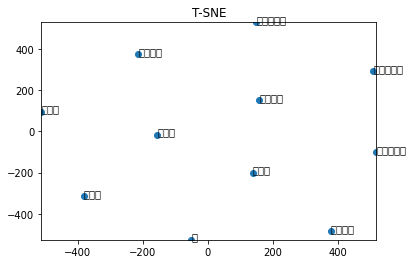

In [38]:
display_closestwords_tsnescatterplot(model, 'খেলা', 100)